In [264]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
import os


In [ ]:
# CSV-Datei laden: Anpassen mit deinem Pfad

#Daten von Dominic einlesen
csv_Dominic_flach1 = r'c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Data\25_BewAn_Langlauf\Vogt,_Dominic/2025-04-23-16-44_IMU_BewAn_Langlauf_flach_hinzurück_1.csv'
csv_Dominic_flach2 = r'c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Data\25_BewAn_Langlauf\Vogt,_Dominic/2025-04-23-16-45_IMU_BewAn_Langlauf_flach_hinzurück_2.csv'

csv_Dominic_berg1 = r'c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Data\25_BewAn_Langlauf\Vogt,_Dominic/2025-04-23-16-42_IMU_BewAn_Langlauf_bergauf_1.csv'
csv_Dominic_berg2 = r'c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Data\25_BewAn_Langlauf\Vogt,_Dominic/2025-04-23-16-43_IMU_BewAn_Langlauf_bergauf_2.csv'


#Daten von Lennard einlesen

csv_Lennard_flach1 = r'c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Data\25_BewAn_Langlauf\Zaschke,_Lenard/2025-04-23-16-58_IMU_BewAn_Langlauf_flach­hinzurück_1.csv'
csv_Lennad_flach2 = r'c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Data\25_BewAn_Langlauf\Zaschke,_Lenard/2025-04-23-16-59_IMU_BewAn_Langlauf_flach_hinzurück_2.csv'
csv_Lennard_berg1 = r'c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Data\25_BewAn_Langlauf\Zaschke,_Lenard/2025-04-23-17-02_IMU_BewAn_Langlauf_bergauf_1.csv'
csv_Lennard_berg2 = r'c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Data\25_BewAn_Langlauf\Zaschke,_Lenard/2025-04-23-17-04_IMU_BewAn_Langlauf_bergauf_2.csv'

#Daten von Paul einlesen

csv_paul_flach1 = r'c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Data\25_BewAn_Langlauf\Krajewski,_Paul/2025-04-23-14-48_IMU_BewAn_Langlauf_1_hinzurück_Flach.csv'


# Überprüfen, ob der Pfad zur Datei existiert
print(os.path.exists(csv_paul_flach1))

print(os.getcwd())

# Dataframe erstellen und Aktivitätsnamen als neue Spalte hinzufügen

df_dominic_flach1 = pd.read_csv(csv_Dominic_flach1, skiprows=3, sep=';', decimal=',')
df_dominic_flach2 = pd.read_csv(csv_Dominic_flach2, skiprows=3, sep=';', decimal=',')
df_dominic_berg1 = pd.read_csv(csv_Dominic_berg1, skiprows=3, sep=';', decimal=',')
df_dominic_berg2 = pd.read_csv(csv_Dominic_berg2, skiprows=3, sep=';', decimal=',')



False
c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock


C:\Users\Dominic Vogt\AppData\Local\Temp\ipykernel_3508\1825006445.py:30: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dominic_flach1 = pd.read_csv(csv_Dominic_flach1, skiprows=3, sep=';', decimal=',')
C:\Users\Dominic Vogt\AppData\Local\Temp\ipykernel_3508\1825006445.py:31: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dominic_flach2 = pd.read_csv(csv_Dominic_flach2, skiprows=3, sep=';', decimal=',')
C:\Users\Dominic Vogt\AppData\Local\Temp\ipykernel_3508\1825006445.py:32: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dominic_berg1 = pd.read_csv(csv_Dominic_berg1, skiprows=3, sep=';', decimal=',')
C:\Users\Dominic Vogt\AppData\Local\Temp\ipykernel_3508\1825006445.py:33: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dominic_berg2 = pd.read_csv(csv_Domin

In [266]:
#Daten zuschneiden um Störungen zu entfernen

# dominic_flach1 zuschneiden
df_dominic_flach1_0_15 = df_dominic_flach1[(df_dominic_flach1["time"] >= 0) & (df_dominic_flach1["time"] <= 15)].copy()    # Von 0 bis 15 Sekunden
df_dominic_flach1_22_end = df_dominic_flach1[df_dominic_flach1["time"] >= 22].reset_index(drop=True).copy()     # Von 22 Sekunden bis zum Ende

# dominic_flach2 zuschneiden
df_dominic_flach2_0_15 = df_dominic_flach2[(df_dominic_flach2["time"] >= 0) & (df_dominic_flach2["time"] <= 15)].copy()     # Von 0 bis 15 Sekunden
df_dominic_flach2_22_end = df_dominic_flach2[df_dominic_flach2["time"] >= 22].reset_index(drop=True).copy()     # Von 22 Sekunden bis zum Ende


df_dominic_flach1_0_15["Aufzeichnung"] = "Dominic_Flach_1"
df_dominic_flach1_22_end["Aufzeichnung"] = "Dominic_Flach_2"
df_dominic_flach2_0_15["Aufzeichnung"] = "Dominic_Flach_3"
df_dominic_flach2_22_end["Aufzeichnung"] = "Dominic_Flach_4"

df_dominic_berg1["Aufzeichnung"] = "Dominic_Berg1"
df_dominic_berg2["Aufzeichnung"] = "Dominic_Berg2"

In [267]:
# Hier kaann einer der in der oberen Zeilen definierten Dataframes verwendet werden um diesen in den nachfolgenden Zeilen zu plotten
# Dazu einfach den namen hier unten nach dem = Zeichen anpassen

testdf = df_dominic_berg2

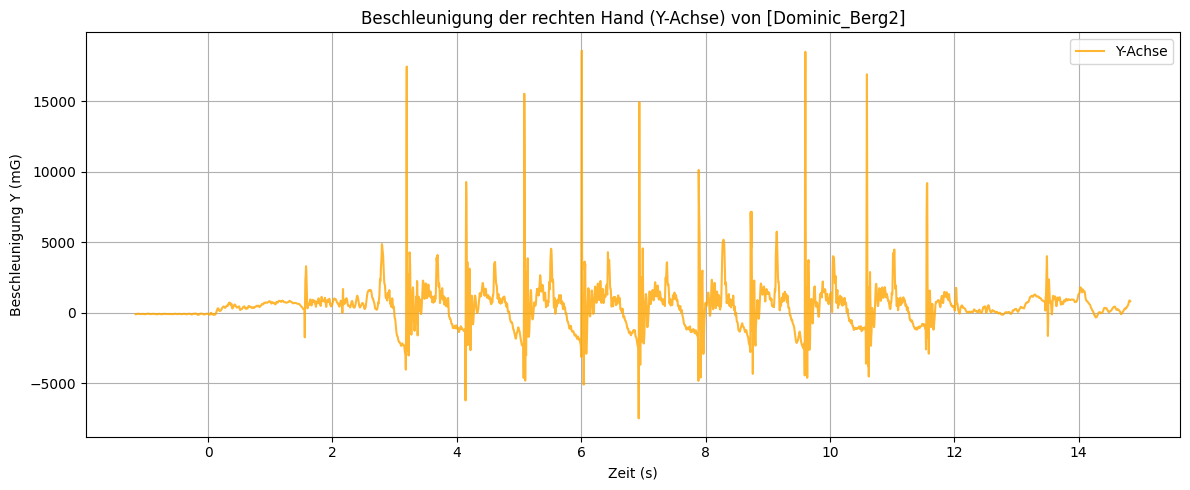

In [268]:
def plot_acceleration_y_axis(df, title_suffix=""):
    # Versuche, den Aktivitätsnamen aus der Spalte zu holen, falls vorhanden
    if "Aufzeichnung" in df.columns:
        activity = df["Aufzeichnung"].iloc[0]
        title = f"Beschleunigung der rechten Hand (Y-Achse) von [{activity}]{title_suffix}"
    else:
        title = f"Beschleunigung der rechten Hand (Y-Achse) von {title_suffix}"

    plt.figure(figsize=(12, 5))
    plt.plot(df["time"], df["RT Hand Accel Sensor Y (mG)"], label="Y-Achse", color="orange", alpha=0.8)
    plt.title(title)
    plt.xlabel("Zeit (s)")
    plt.ylabel("Beschleunigung Y (mG)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Beispiel-Aufruf:
plot_acceleration_y_axis(testdf)

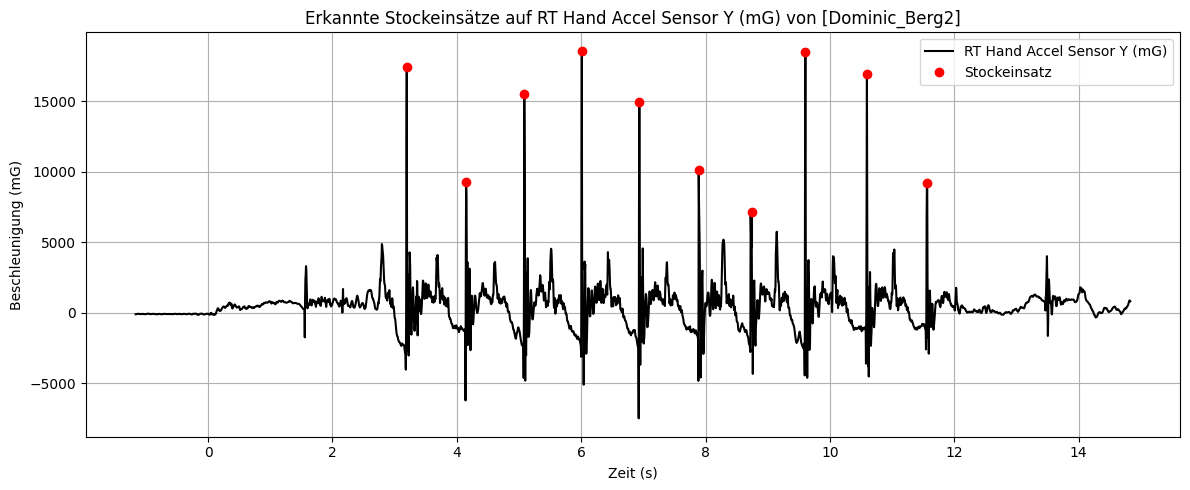

In [269]:
def plot_peaks_on_axis(df, axis_col, height=7000, distance=20, min_time_diff=0.5, title_suffix=""):
    # Peaks erkennen
    peaks, _ = find_peaks(df[axis_col], height=height, distance=distance)
    peak_times = df["time"].iloc[peaks].values

    # Peaks filtern: nur behalten, wenn Abstand zum vorherigen >= min_time_diff
    filtered_peaks = []
    last_time = -np.inf
    for idx, t in zip(peaks, peak_times):
        if t - last_time >= min_time_diff:
            filtered_peaks.append(idx)
            last_time = t
    filtered_peaks = np.array(filtered_peaks)

    # Neue Spalte im DataFrame: True bei Peak, sonst False
    df["is_peak"] = False
    df.loc[df.index[filtered_peaks], "is_peak"] = True

    # Aktivitätsnamen für den Titel holen (nur falls "Aufzeichnung" existiert)
    if "Aufzeichnung" in df.columns:
        activity = df["Aufzeichnung"].iloc[0]
        title = f"Erkannte Stockeinsätze auf {axis_col} von [{activity}]{title_suffix}"
    else:
        title = f"Erkannte Stockeinsätze auf {axis_col}{title_suffix}"

    # Plot mit Markierungen
    plt.figure(figsize=(12, 5))
    plt.plot(df["time"], df[axis_col], label=axis_col, color="black")
    plt.plot(df["time"].iloc[filtered_peaks], df[axis_col].iloc[filtered_peaks], "ro", label="Stockeinsatz")
    plt.title(title)
    plt.xlabel("Zeit (s)")
    plt.ylabel("Beschleunigung (mG)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    return filtered_peaks

# Beispiel-Aufruf:
peaks = plot_peaks_on_axis(testdf, "RT Hand Accel Sensor Y (mG)", height=7000, distance=20, min_time_diff=0.5)


In [270]:
def analyze_peaks(df):
    # Indizes der Peaks aus der Spalte 'is_peak'
    peaks = df.index[df["is_peak"] == True].to_numpy()
    peak_times = df.loc[peaks, "time"].values.round(2)  

    # Zeitabstände zwischen den Einschlägen berechnen
    time_differences = np.diff(peak_times)
    delta_t = np.append(time_differences, np.nan)  # Letzter Wert NaN

    # Aktivitätsnamen holen, falls vorhanden
    if "Aufzeichnung" in df.columns:
        activity = df["Aufzeichnung"].iloc[0]
    else:
        activity = None

    # Tabelle erstellen, alle Spalten direkt
    impact_df = pd.DataFrame({
        "Schub-Nr.": np.arange(1, len(peaks) + 1),
        "Index": peaks,
        "Zeit (s)": peak_times,
        "Aufzeichnung": activity,
        "Δt zum nächsten Einschlag (s)": delta_t
    })

    # Statistik berechnen
    mean_dt = np.mean(time_differences)
    std_dt = np.std(time_differences)

    # Schübe pro Minute berechnen
    if len(peaks) > 1:
        total_time = peak_times[-1] - peak_times[0]
        shoves_per_minute = len(peaks) / (total_time / 60) if total_time > 0 else np.nan
    else:
        shoves_per_minute = np.nan

    return impact_df, mean_dt, std_dt, shoves_per_minute

# Beispiel-Aufruf:
impact_df, mean_dt, std_dt, shoves_per_minute = analyze_peaks(testdf)
#print(impact_df)

# Ausgabe der Berechnungen
print(f"Mittelwert der Zeitabstände: {mean_dt:.3f} Sekunden")
print(f"Standardabweichung der Zeitabstände: {std_dt:.3f} Sekunden")
print(f"Schübe pro Minute: {shoves_per_minute:.2f}")

Mittelwert der Zeitabstände: 0.929 Sekunden
Standardabweichung der Zeitabstände: 0.045 Sekunden
Schübe pro Minute: 71.77


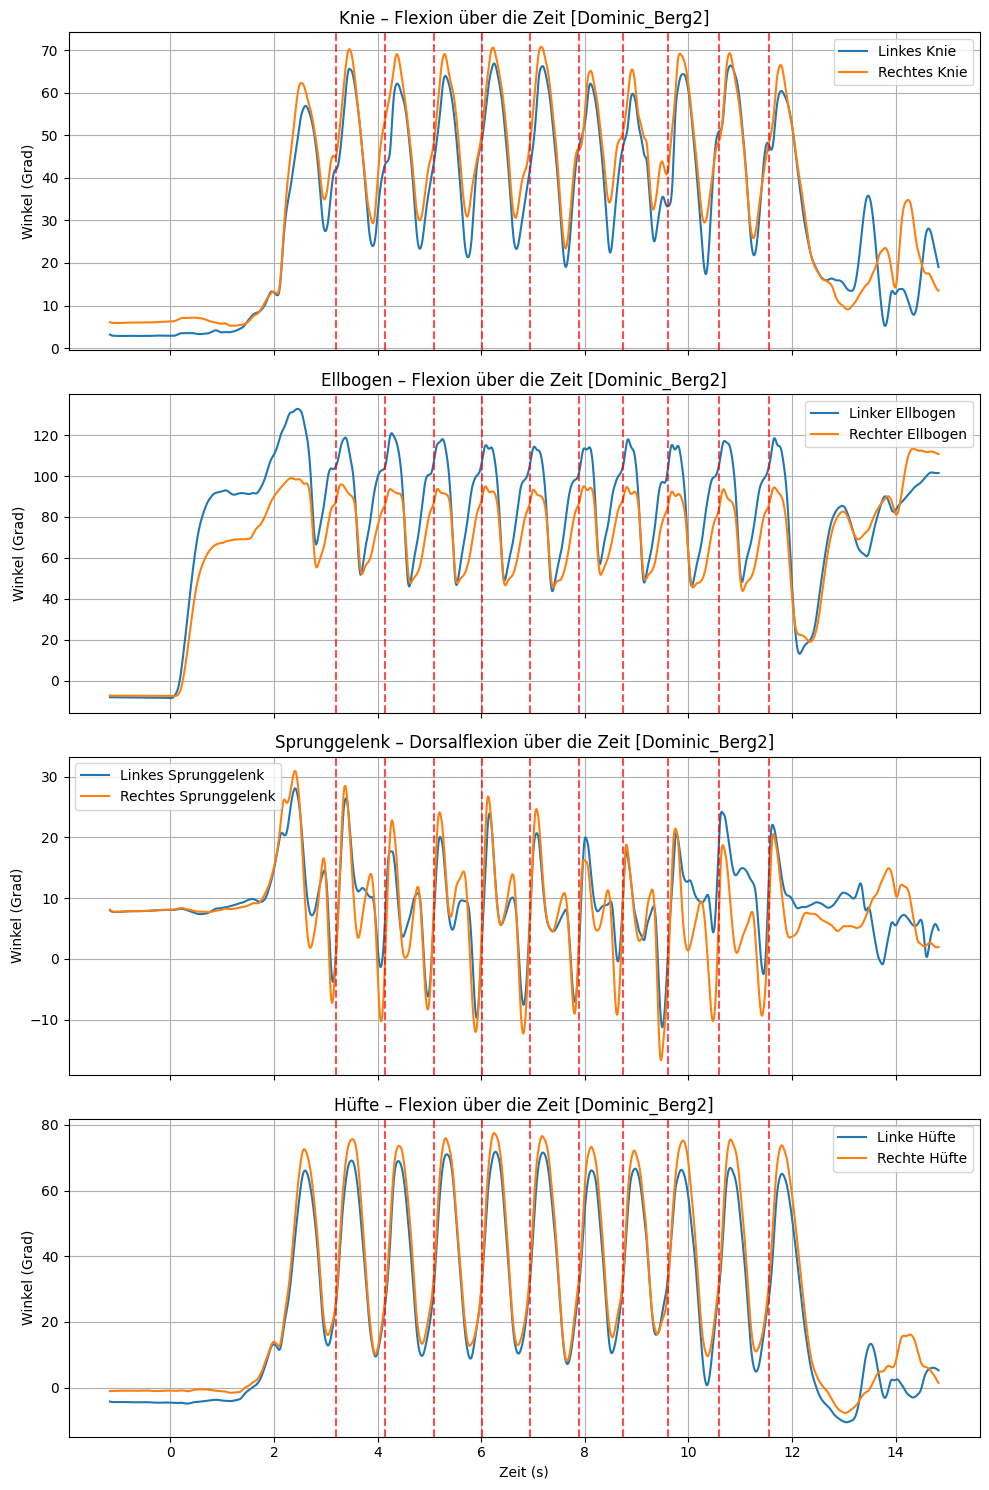

In [271]:
def plot_joint_angles_with_peaks(df, title_suffix=""):
    # Aktivitätsnamen für den Titel holen (nur falls "Aufzeichnung" existiert)
    if "Aufzeichnung" in df.columns:
        activity = df["Aufzeichnung"].iloc[0]
        title_knie = f"Knie – Flexion über die Zeit [{activity}]{title_suffix}"
        title_ellbogen = f"Ellbogen – Flexion über die Zeit [{activity}]{title_suffix}"
        title_sprunggelenk = f"Sprunggelenk – Dorsalflexion über die Zeit [{activity}]{title_suffix}"
        title_huefte = f"Hüfte – Flexion über die Zeit [{activity}]{title_suffix}"
    else:
        title_knie = f"Knie – Flexion über die Zeit{title_suffix}"
        title_ellbogen = f"Ellbogen – Flexion über die Zeit{title_suffix}"
        title_sprunggelenk = f"Sprunggelenk – Dorsalflexion über die Zeit{title_suffix}"
        title_huefte = f"Hüfte – Flexion über die Zeit{title_suffix}"

    peaks = df.index[df["is_peak"] == True].to_numpy()
    peak_times = df.loc[peaks, "time"].values

    winkel_spalten = [
        'LT Hip Flexion (Grad)', 'RT Hip Flexion (Grad)',
        'LT Knee Flexion (Grad)', 'RT Knee Flexion (Grad)',
        'LT Elbow Flexion (Grad)', 'RT Elbow Flexion (Grad)',
        'LT Ankle Dorsiflexion (Grad)', 'RT Ankle Dorsiflexion (Grad)',
    ]
    winkel_df = df[winkel_spalten]

    fig, axes = plt.subplots(4, 1, figsize=(10, 15), sharex=True)

    # Knie
    axes[0].plot(df["time"], winkel_df['LT Knee Flexion (Grad)'], label='Linkes Knie')
    axes[0].plot(df["time"], winkel_df['RT Knee Flexion (Grad)'], label='Rechtes Knie')
    axes[0].set_title(title_knie)
    axes[0].set_ylabel('Winkel (Grad)')
    axes[0].legend()
    axes[0].grid()
    for peak_time in peak_times:
        axes[0].axvline(x=peak_time, color='red', linestyle='--', alpha=0.7)

    # Ellbogen
    axes[1].plot(df["time"], winkel_df['LT Elbow Flexion (Grad)'], label='Linker Ellbogen')
    axes[1].plot(df["time"], winkel_df['RT Elbow Flexion (Grad)'], label='Rechter Ellbogen')
    axes[1].set_title(title_ellbogen)
    axes[1].set_ylabel('Winkel (Grad)')
    axes[1].legend()
    axes[1].grid()
    for peak_time in peak_times:
        axes[1].axvline(x=peak_time, color='red', linestyle='--', alpha=0.7)

    # Sprunggelenk
    axes[2].plot(df["time"], winkel_df['LT Ankle Dorsiflexion (Grad)'], label='Linkes Sprunggelenk')
    axes[2].plot(df["time"], winkel_df['RT Ankle Dorsiflexion (Grad)'], label='Rechtes Sprunggelenk')
    axes[2].set_title(title_sprunggelenk)
    axes[2].set_ylabel('Winkel (Grad)')
    axes[2].legend()
    axes[2].grid()
    for peak_time in peak_times:
        axes[2].axvline(x=peak_time, color='red', linestyle='--', alpha=0.7)

    # Hüfte
    axes[3].plot(df["time"], winkel_df['LT Hip Flexion (Grad)'], label='Linke Hüfte')
    axes[3].plot(df["time"], winkel_df['RT Hip Flexion (Grad)'], label='Rechte Hüfte')
    axes[3].set_title(title_huefte)
    axes[3].set_xlabel('Zeit (s)')
    axes[3].set_ylabel('Winkel (Grad)')
    axes[3].legend()
    axes[3].grid()
    for peak_time in peak_times:
        axes[3].axvline(x=peak_time, color='red', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# Beispiel-Aufruf:
plot_joint_angles_with_peaks(testdf)

In [272]:
def berechne_max_min_rom(df):
    """
    Berechnet für jedes Intervall zwischen den Peaks die Min/Max/ROM-Werte für Knie, Hüfte, Ellbogen und Sprunggelenk.
    Erwartet Spaltennamen mit (Grad).
    """

    peaks = df.index[df["is_peak"] == True].to_numpy()
    peak_times = df.loc[peaks, "time"].values  # <-- .loc statt .iloc


    max_min_angles_rom = []
    for i in range(len(peaks)-1):
        start_idx = peaks[i]
        end_idx = peaks[i+1]
        interval_df = df.iloc[start_idx:end_idx]

        # Max und Min Werte für Knie, Hüfte, Ellbogen, Sprunggelenk (mit (Grad))
        knee_left_min = interval_df["LT Knee Flexion (Grad)"].min().round(1)
        knee_left_max = interval_df["LT Knee Flexion (Grad)"].max().round(1)
        knee_right_min = interval_df["RT Knee Flexion (Grad)"].min().round(1)
        knee_right_max = interval_df["RT Knee Flexion (Grad)"].max().round(1)

        hip_left_min = interval_df["LT Hip Flexion (Grad)"].min().round(1)
        hip_left_max = interval_df["LT Hip Flexion (Grad)"].max().round(1)
        hip_right_min = interval_df["RT Hip Flexion (Grad)"].min().round(1)
        hip_right_max = interval_df["RT Hip Flexion (Grad)"].max().round(1)

        elbow_left_min = interval_df["LT Elbow Flexion (Grad)"].min().round(1)
        elbow_left_max = interval_df["LT Elbow Flexion (Grad)"].max().round(1)
        elbow_right_min = interval_df["RT Elbow Flexion (Grad)"].min().round(1)
        elbow_right_max = interval_df["RT Elbow Flexion (Grad)"].max().round(1)

        ankle_left_min = interval_df["LT Ankle Dorsiflexion (Grad)"].min().round(1)
        ankle_left_max = interval_df["LT Ankle Dorsiflexion (Grad)"].max().round(1)
        ankle_right_min = interval_df["RT Ankle Dorsiflexion (Grad)"].min().round(1)
        ankle_right_max = interval_df["RT Ankle Dorsiflexion (Grad)"].max().round(1)

        # ROM für jedes Gelenk
        knee_left_rom = knee_left_max - knee_left_min
        knee_right_rom = knee_right_max - knee_right_min
        hip_left_rom = hip_left_max - hip_left_min
        hip_right_rom = hip_right_max - hip_right_min
        elbow_left_rom = elbow_left_max - elbow_left_min
        elbow_right_rom = elbow_right_max - elbow_right_min
        ankle_left_rom = ankle_left_max - ankle_left_min
        ankle_right_rom = ankle_right_max - ankle_right_min

        # Speichern der Ergebnisse in einer Liste

        max_min_angles_rom.append({
            "Knee Left Min": knee_left_min, "Knee Right Min": knee_right_min,
            "Knee Left Max": knee_left_max, "Knee Right Max": knee_right_max,
            "Knee Left ROM": knee_left_rom, "Knee Right ROM": knee_right_rom,

            "Hip Left Min": hip_left_min, "Hip Right Min": hip_right_min,
            "Hip Left Max": hip_left_max, "Hip Right Max": hip_right_max,
            "Hip Left ROM": hip_left_rom, "Hip Right ROM": hip_right_rom,

            "Elbow Left Min": elbow_left_min, "Elbow Right Min": elbow_right_min,
            "Elbow Left Max": elbow_left_max, "Elbow Right Max": elbow_right_max,
            "Elbow Left ROM": elbow_left_rom, "Elbow Right ROM": elbow_right_rom,

            "Ankle Left Min": ankle_left_min, "Ankle Right Min": ankle_right_min,
            "Ankle Left Max": ankle_left_max, "Ankle Right Max": ankle_right_max,
            "Ankle Left ROM": ankle_left_rom, "Ankle Right ROM": ankle_right_rom,
        })

    max_min_rom_df = pd.DataFrame(max_min_angles_rom)
    return max_min_rom_df


max_min_rom_df = berechne_max_min_rom(testdf)
max_min_rom_df_zeit = pd.concat([impact_df, max_min_rom_df], axis=1) # zusammenführen der beiden DataFrames
#print(max_min_rom_df)


In [273]:
def berechne_avg_rom(df):
    """
    Berechnet für jedes Intervall zwischen den Peaks den Durchschnitts-ROM für Knie, Hüfte, Ellbogen und Sprunggelenk (links/rechts gemittelt).
    Gibt einen DataFrame mit den Mittelwerten pro Schub-Zyklus zurück.
    """
    peaks = df.index[df["is_peak"] == True].to_numpy()

    avg_rom_list = []
    for i in range(len(peaks)-1):
        start_idx = peaks[i]
        end_idx = peaks[i+1]
        interval_df = df.iloc[start_idx:end_idx]

        # ROM für jedes Gelenk (links/rechts)
        knee_left_rom = interval_df["LT Knee Flexion (Grad)"].max() - interval_df["LT Knee Flexion (Grad)"].min()
        knee_right_rom = interval_df["RT Knee Flexion (Grad)"].max() - interval_df["RT Knee Flexion (Grad)"].min()
        hip_left_rom = interval_df["LT Hip Flexion (Grad)"].max() - interval_df["LT Hip Flexion (Grad)"].min()
        hip_right_rom = interval_df["RT Hip Flexion (Grad)"].max() - interval_df["RT Hip Flexion (Grad)"].min()
        elbow_left_rom = interval_df["LT Elbow Flexion (Grad)"].max() - interval_df["LT Elbow Flexion (Grad)"].min()
        elbow_right_rom = interval_df["RT Elbow Flexion (Grad)"].max() - interval_df["RT Elbow Flexion (Grad)"].min()
        ankle_left_rom = interval_df["LT Ankle Dorsiflexion (Grad)"].max() - interval_df["LT Ankle Dorsiflexion (Grad)"].min()
        ankle_right_rom = interval_df["RT Ankle Dorsiflexion (Grad)"].max() - interval_df["RT Ankle Dorsiflexion (Grad)"].min()

        # Mittelwert links/rechts
        knee_avg_rom = np.mean([knee_left_rom, knee_right_rom])
        hip_avg_rom = np.mean([hip_left_rom, hip_right_rom])
        elbow_avg_rom = np.mean([elbow_left_rom, elbow_right_rom])
        ankle_avg_rom = np.mean([ankle_left_rom, ankle_right_rom])

        avg_rom_list.append({
            "Knee Avg ROM": round(knee_avg_rom, 2),
            "Hip Avg ROM": round(hip_avg_rom, 2),
            "Elbow Avg ROM": round(elbow_avg_rom, 2),
            "Ankle Avg ROM": round(ankle_avg_rom, 2),
        })

    avg_rom_df = pd.DataFrame(avg_rom_list)
    return avg_rom_df

# Beispiel-Aufruf:
avg_rom_df = berechne_avg_rom(testdf)
avg_rom_df_zeit = pd.concat([impact_df, avg_rom_df], axis=1)  # zusammenführen der beiden DataFrames
print(avg_rom_df_zeit)

   Schub-Nr.  Index  Zeit (s)   Aufzeichnung  Δt zum nächsten Einschlag (s)  \
0          1    872      3.20  Dominic_Berg2                           0.95   
1          2   1063      4.15  Dominic_Berg2                           0.93   
2          3   1250      5.08  Dominic_Berg2                           0.93   
3          4   1435      6.01  Dominic_Berg2                           0.93   
4          5   1620      6.94  Dominic_Berg2                           0.95   
5          6   1811      7.89  Dominic_Berg2                           0.85   
6          7   1981      8.74  Dominic_Berg2                           0.86   
7          8   2154      9.60  Dominic_Berg2                           1.00   
8          9   2352     10.60  Dominic_Berg2                           0.96   
9         10   2546     11.56  Dominic_Berg2                            NaN   

   Knee Avg ROM  Hip Avg ROM  Elbow Avg ROM  Ankle Avg ROM  
0         41.28        62.60          55.47          33.26  
1       

In [274]:
"""def save_avg_rom_df(df):
    # Hole den Aktivitätsnamen aus der ersten Zeile der Spalte "Aufzeichnung"
    if "Aufzeichnung" in df.columns:
        activity = str(df["Aufzeichnung"].iloc[0])
    else:
        activity = "Unbekannt"

    # Zielordner definieren
    basis_ordner = r'c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock'
    zielordner = os.path.join(basis_ordner, "Data_nach_Auswertung")

    # Ordner erstellen, falls nicht vorhanden
    if not os.path.exists(zielordner):
        os.makedirs(zielordner)

    # Dateiname zusammenbauen
    dateiname = f"{activity}_avg_rom.csv"
    pfad = os.path.join(zielordner, dateiname)

    # DataFrame als CSV speichern
    df.to_csv(pfad, sep=";", index=False)
    print(f"DataFrame gespeichert unter: {pfad}")

# Beispiel-Aufruf:
save_avg_rom_df(avg_rom_df_zeit)"""

'def save_avg_rom_df(df):\n    # Hole den Aktivitätsnamen aus der ersten Zeile der Spalte "Aufzeichnung"\n    if "Aufzeichnung" in df.columns:\n        activity = str(df["Aufzeichnung"].iloc[0])\n    else:\n        activity = "Unbekannt"\n\n    # Zielordner definieren\n    basis_ordner = r\'c:\\Arbeitsplatz\\Studium_Innsbruck\\Bewegungsanalyse\\MGST_23_Bewegungsanalyse_LL_Doppelstock\'\n    zielordner = os.path.join(basis_ordner, "Data_nach_Auswertung")\n\n    # Ordner erstellen, falls nicht vorhanden\n    if not os.path.exists(zielordner):\n        os.makedirs(zielordner)\n\n    # Dateiname zusammenbauen\n    dateiname = f"{activity}_avg_rom.csv"\n    pfad = os.path.join(zielordner, dateiname)\n\n    # DataFrame als CSV speichern\n    df.to_csv(pfad, sep=";", index=False)\n    print(f"DataFrame gespeichert unter: {pfad}")\n\n# Beispiel-Aufruf:\nsave_avg_rom_df(avg_rom_df_zeit)'

In [275]:
def save_avg_rom_df(df, mean_dt, std_dt, shoves_per_minute):
    import os
    import pandas as pd
    import re

    if df.empty:
        print("Warnung: Der übergebene DataFrame ist leer.")
        return

    if "Aufzeichnung" not in df.columns:
        print("Fehler: Spalte 'Aufzeichnung' fehlt im DataFrame.")
        return

    # Aktivitätsname bereinigen
    activity = re.sub(r'[\\/*?:"<>|]', "_", str(df["Aufzeichnung"].iloc[0]))

    basis_ordner = r'c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock'
    zielordner = os.path.join(basis_ordner, "Data_nach_Auswertung")
    os.makedirs(zielordner, exist_ok=True)

    dateiname = f"{activity}_avg_rom.csv"
    pfad = os.path.join(zielordner, dateiname)

    # Öffne die Datei im Schreibmodus und schreibe die Zusatzinfos
    with open(pfad, "w", encoding="utf-8") as f:
        f.write(f"# mean_dt: {mean_dt}\n")
        f.write(f"# std_dt: {std_dt}\n")
        f.write(f"# shoves_per_minute: {shoves_per_minute}\n")
        f.write("#\n")  # Leere Zeile zur Trennung
        df.to_csv(f, sep=";", index=False)

    print(f"DataFrame mit Metadaten gespeichert unter: {pfad}")
    return pfad

# Beispiel-Aufruf:
save_avg_rom_df(avg_rom_df_zeit, mean_dt, std_dt, shoves_per_minute)

DataFrame mit Metadaten gespeichert unter: c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Data_nach_Auswertung\Dominic_Berg2_avg_rom.csv


'c:\\Arbeitsplatz\\Studium_Innsbruck\\Bewegungsanalyse\\MGST_23_Bewegungsanalyse_LL_Doppelstock\\Data_nach_Auswertung\\Dominic_Berg2_avg_rom.csv'

In [276]:
def berechne_statistik_rom(df):
    """
    Berechnet Mittelwert und Standardabweichung für alle numerischen Spalten ab der dritten Spalte eines DataFrames.
    Gibt ein DataFrame mit Spaltenname, Mittelwert und Standardabweichung zurück.
    """
    numerische_spalten = df.columns[4:]  # Spalten ab der dritten Spalte
    durchschnittswerte = df[numerische_spalten].mean().round(2)
    standardabweichungen = df[numerische_spalten].std().round(2)

    statistik_df = pd.DataFrame({
        "Spalte": numerische_spalten,
        "Mittelwert": durchschnittswerte.values,
        "Standardabweichung": standardabweichungen.values
    })
    return statistik_df

# Beispiel-Aufruf:
statistik_df = berechne_statistik_rom(max_min_rom_df_zeit)
print(statistik_df)

                           Spalte  Mittelwert  Standardabweichung
0   Δt zum nächsten Einschlag (s)        0.93                0.05
1                   Knee Left Min       21.98                2.43
2                  Knee Right Min       29.58                3.27
3                   Knee Left Max       64.18                2.42
4                  Knee Right Max       68.77                2.07
5                   Knee Left ROM       42.20                4.04
6                  Knee Right ROM       39.19                4.97
7                    Hip Left Min        8.63                4.23
8                   Hip Right Min       12.13                2.67
9                    Hip Left Max       68.72                2.33
10                  Hip Right Max       75.06                1.70
11                   Hip Left ROM       60.09                4.61
12                  Hip Right ROM       62.92                4.03
13                 Elbow Left Min       48.48                3.90
14        

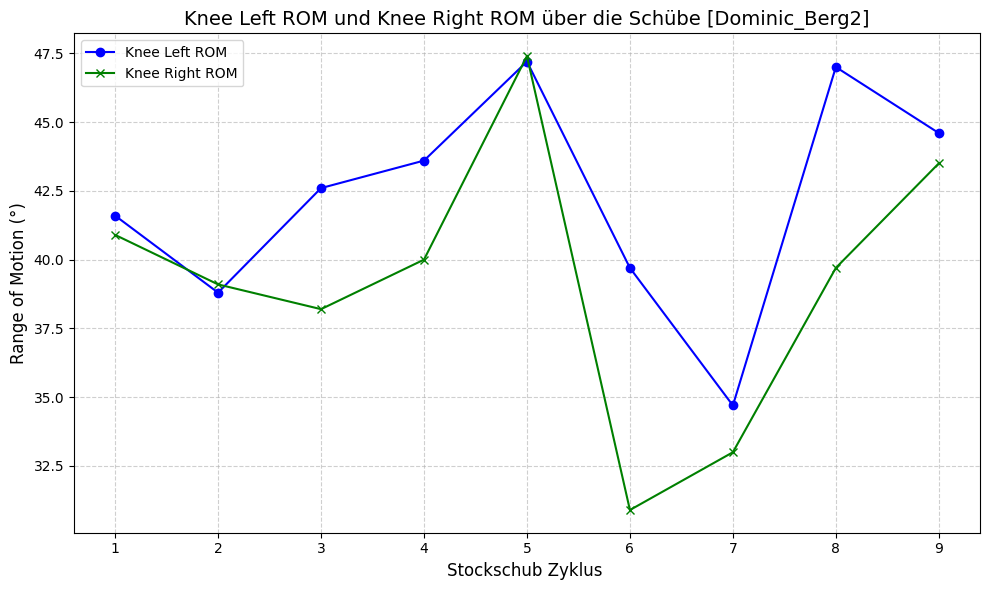

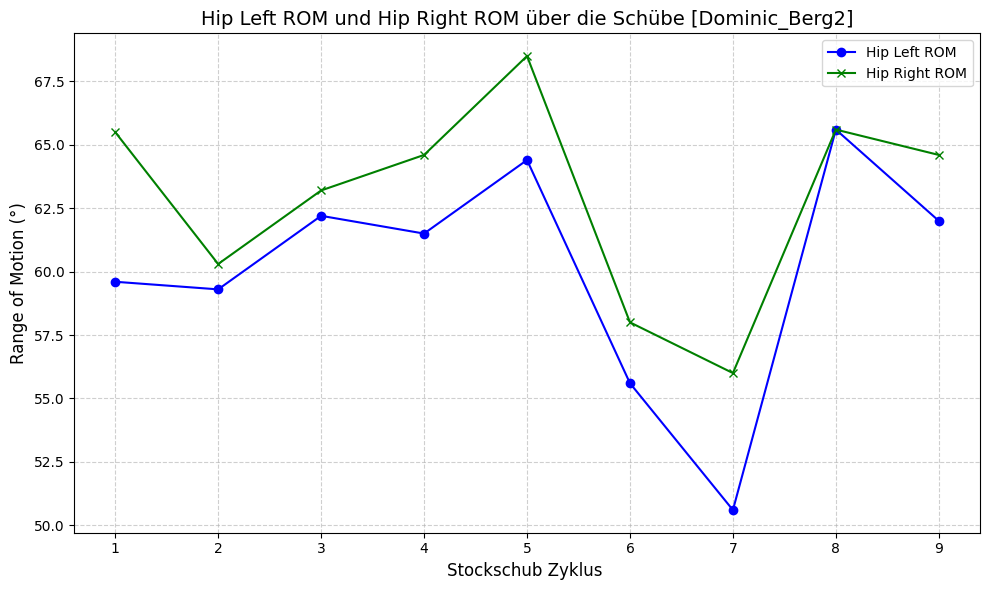

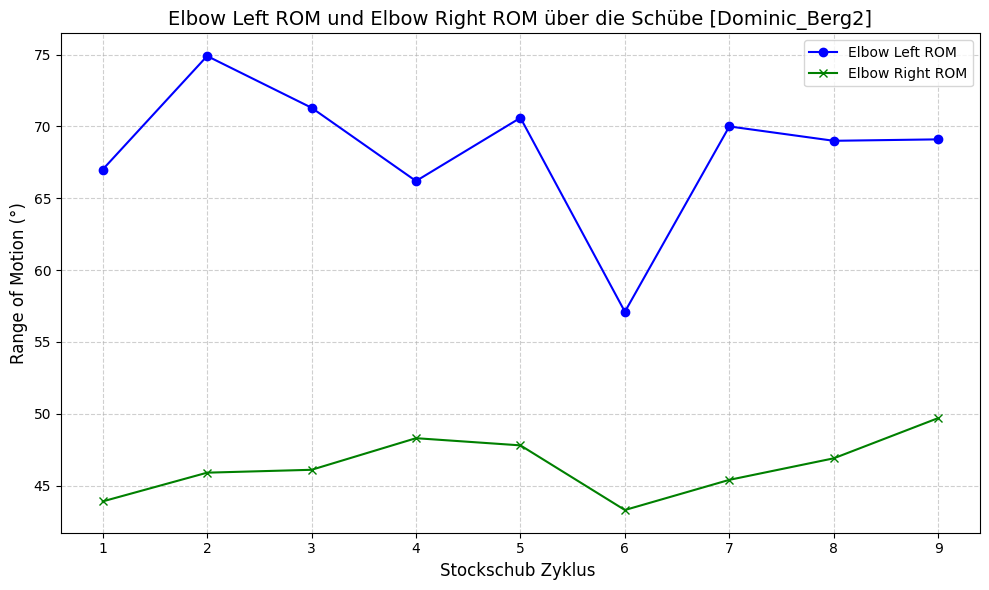

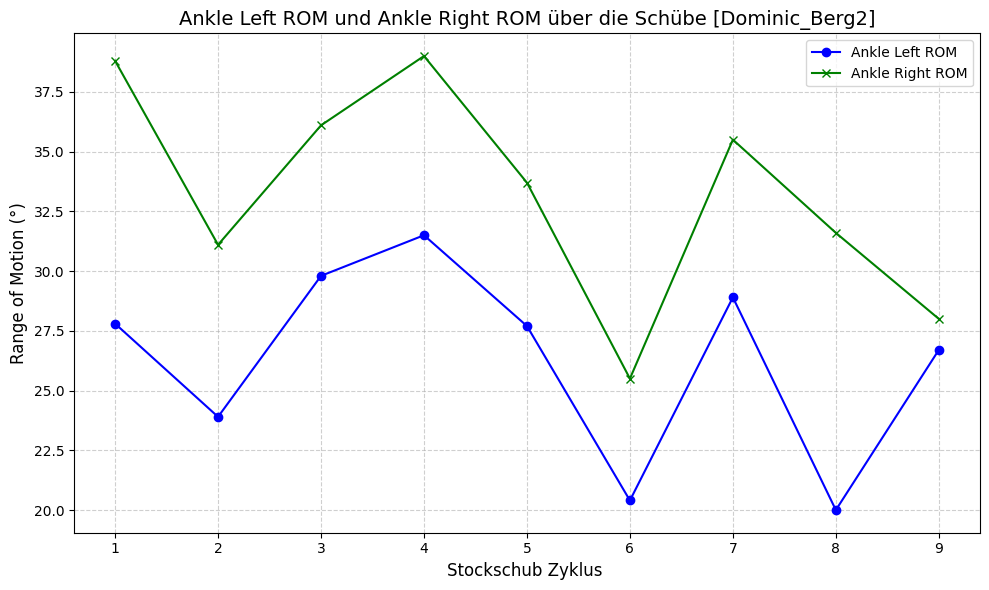

In [277]:

def plot_rom_verlauf(df, spalte_links, spalte_rechts, title="ROM-Verlauf", ylabel="Range of Motion (°)"):
    """
    Plottet den Verlauf von zwei ROM-Spalten (z.B. links/rechts) über die Schub-Nummer (beginnend bei 1).
    Der Titel wird automatisch um die Aktivität ergänzt, falls vorhanden.
    """
    # Aktivitätsnamen für den Titel holen (nur falls "Aufzeichnung" existiert)
    if "Aufzeichnung" in df.columns:
        activity = df["Aufzeichnung"].iloc[0]
        title = f"{title} [{activity}]"
    plt.figure(figsize=(10, 6))
    schuab_nummer = np.arange(1, len(df) + 1)  # Schub 1, 2, 3, ...
    plt.plot(schuab_nummer, df[spalte_links], label=spalte_links, color="blue", marker="o")
    plt.plot(schuab_nummer, df[spalte_rechts], label=spalte_rechts, color="green", marker="x")
    plt.title(title, fontsize=14)
    plt.xlabel("Stockschub Zyklus ", fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

# Beispiel-Aufruf:
plot_rom_verlauf(max_min_rom_df_zeit, "Knee Left ROM", "Knee Right ROM", title="Knee Left ROM und Knee Right ROM über die Schübe")
plot_rom_verlauf(max_min_rom_df_zeit, "Hip Left ROM", "Hip Right ROM", title="Hip Left ROM und Hip Right ROM über die Schübe")
plot_rom_verlauf(max_min_rom_df_zeit, "Elbow Left ROM", "Elbow Right ROM", title="Elbow Left ROM und Elbow Right ROM über die Schübe")
plot_rom_verlauf(max_min_rom_df_zeit, "Ankle Left ROM", "Ankle Right ROM", title="Ankle Left ROM und Ankle Right ROM über die Schübe")


In [278]:
def plot_all_rom_verlauf(df, title="Range of Motion (ROM) für Knie, Hüfte, Ellbogen und Sprunggelenk", ylabel="Range of Motion (°)"):
    """
    Plottet den Verlauf aller ROM-Werte (Knie, Hüfte, Ellbogen, Sprunggelenk) über den DataFrame-Index.
    """
    plt.figure(figsize=(12, 8))

    # Knie
    plt.plot(df.index, df["Knee Left ROM"], label="Knee Left ROM", color="blue", linestyle="-")
    plt.plot(df.index, df["Knee Right ROM"], label="Knee Right ROM", color="red", linestyle="-")

    # Hüfte
    plt.plot(df.index, df["Hip Left ROM"], label="Hip Left ROM", color="blue", linestyle="--")
    plt.plot(df.index, df["Hip Right ROM"], label="Hip Right ROM", color="red", linestyle="--")

    # Ellbogen
    plt.plot(df.index, df["Elbow Left ROM"], label="Elbow Left ROM", color="blue", linestyle=":")
    plt.plot(df.index, df["Elbow Right ROM"], label="Elbow Right ROM", color="red", linestyle=":")

    # Sprunggelenk
    #plt.plot(df.index, df["Ankle Left ROM"], label="Ankle Left ROM", color="blue", linestyle="-.")
    #plt.plot(df.index, df["Ankle Right ROM"], label="Ankle Right ROM", color="red", linestyle="-.")

    plt.title(title, fontsize=16)
    plt.xlabel("Position im DataFrame (Index)", fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

# Beispiel-Aufruf:
#plot_all_rom_verlauf(max_min_rom_df_zeit)

In [279]:
def plot_avg_rom_verlauf(df, title="Durchschnittliche ROM für Knie, Hüfte, Ellbogen und Sprunggelenk", ylabel="Durchschnittliche ROM (°)"):
    """
    Berechnet und plottet den Verlauf der durchschnittlichen ROM-Werte für Knie, Hüfte, Ellbogen und Sprunggelenk über den DataFrame-Index.
    Erwartet Spalten: 'Knee Left ROM', 'Knee Right ROM', 'Hip Left ROM', 'Hip Right ROM', 'Elbow Left ROM', 'Elbow Right ROM', 'Ankle Left ROM', 'Ankle Right ROM'
    """
    df = df.copy()
    df["Knee Avg ROM"] = (df["Knee Left ROM"] + df["Knee Right ROM"]) / 2
    df["Hip Avg ROM"] = (df["Hip Left ROM"] + df["Hip Right ROM"]) / 2
    df["Elbow Avg ROM"] = (df["Elbow Left ROM"] + df["Elbow Right ROM"]) / 2
    df["Ankle Avg ROM"] = (df["Ankle Left ROM"] + df["Ankle Right ROM"]) / 2

    plt.figure(figsize=(12, 8))
    plt.plot(df.index, df["Knee Avg ROM"], label="Knee Avg ROM", color="blue", linestyle="-")
    plt.plot(df.index, df["Hip Avg ROM"], label="Hip Avg ROM", color="green", linestyle="--")
    plt.plot(df.index, df["Elbow Avg ROM"], label="Elbow Avg ROM", color="red", linestyle=":")
    #plt.plot(df.index, df["Ankle Avg ROM"], label="Ankle Avg ROM", color="purple", linestyle="-.")
    plt.title(title, fontsize=16)
    plt.xlabel("Position im DataFrame (Index)", fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

# Beispiel-Aufruf:
#plot_avg_rom_verlauf(max_min_rom_df_zeit)

In [280]:
def plot_delta_t_impact(df, title="Zeitabstände zwischen den Einschlägen", ylabel="Zeitabstand (s)"):
    """
    Plottet die Zeitabstände (Δt) zwischen den Einschlägen über den DataFrame-Index.
    Erwartet eine Spalte 'Δt zum nächsten Einschlag (s)' im DataFrame.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df["Δt zum nächsten Einschlag (s)"], label="Δt zum nächsten Einschlag", color="blue", marker="o")
    plt.title(title, fontsize=16)
    plt.xlabel("Position im DataFrame (Index)", fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

# Beispiel-Aufruf:
#plot_delta_t_impact(max_min_rom_df_zeit)